# JS09 - TUGAS 1

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

file_id = "1RgIXDq8PnRGYw0otnpbvc3L98_afRkjo"
url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(url)
df.head() # melihat beberapa data awal

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


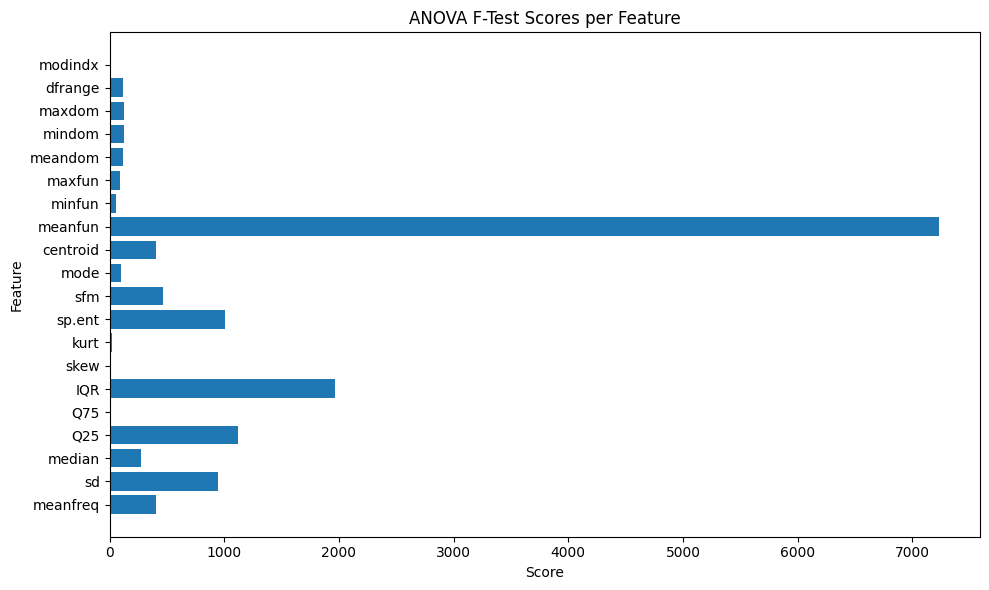

Fitur terbaik: ['sd', 'sp.ent', 'Q25', 'IQR', 'meanfun']


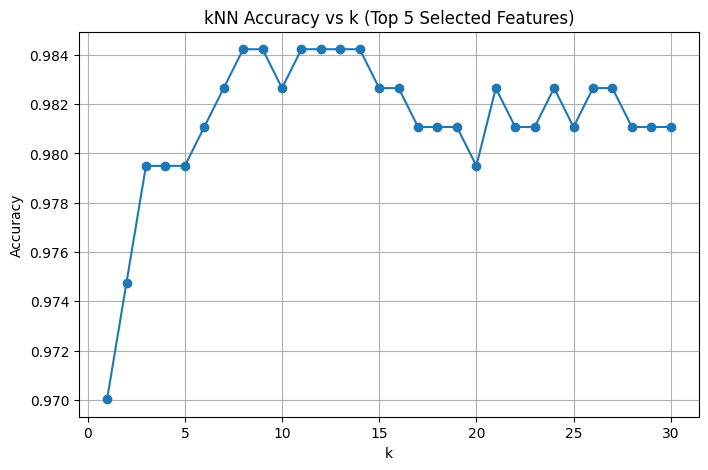

K terbaik: 8
Akurasi terbaik: 0.9842


In [35]:
# Encode label male=0, female=1
df['label'] = df['label'].map({'male': 0, 'female': 1})

X = df.drop("label", axis=1)
y = df['label']

# Seleksi Fitur dengan ANOVA F-test
selector = SelectKBest(score_func=f_classif, k="all")
selector.fit(X, y)

scores = selector.scores_

# Plot skor fitur
plt.figure(figsize=(10, 6))
plt.barh(X.columns, scores)
plt.title("ANOVA F-Test Scores per Feature")
plt.xlabel("Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Ambil 5 fitur terbaik
top_idx = np.argsort(scores)[-5:]
top_features = X.columns[top_idx].tolist()

print("Fitur terbaik:", top_features)

# Training kNN untuk mencari k terbaik
X_selected = df[top_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

k_values = list(range(1, 31))
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accuracies.append(acc)

# Plot k vs akurasi
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("kNN Accuracy vs k (Top 5 Selected Features)")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Nilai k terbaik
best_k = k_values[accuracies.index(max(accuracies))]
best_acc = max(accuracies)

print("K terbaik:", best_k)
print("Akurasi terbaik:", round(best_acc, 4))